## Ayu lestari gunawan
## 2109106054

# Library

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Mengakses dataset dan Melihat informasi mengenai dataset
Dilihat nama-nama kolom dan jenis datanya,melihat apakah ada data yang kosong (NULL),melihat data unik pada setiap kolom yang bertipe object

In [129]:
dataset=pd.read_csv("dataset.csv")
print(dataset.info())
print(dataset.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB
None
Date                      False
Address                   False
Species         

In [130]:
print("Trap=",len(dataset.Trap.unique()))
print("Street=",len(dataset.Street.unique()))
print("Species=",len(dataset.Species.unique()))
print("AddressNumberAndStreet=",len(dataset.AddressNumberAndStreet.unique()))
print("Address=",len(dataset.Address.unique()))

Trap= 136
Street= 128
Species= 7
AddressNumberAndStreet= 138
Address= 138


# Data Preprocessing
## Encoding & Standarisasi
Mengubah data-data unik yang bisa diubah dari text (string) menjadi kategorikal. Kemudian pada kolom latitude dan longitude di lakukan standarisasi (optional).

In [131]:
encoder = OrdinalEncoder()
dataset[["Trap","Street","Species","Address","AddressNumberAndStreet"]]=encoder.fit_transform(dataset[["Trap","Street","Species","Address","AddressNumberAndStreet"]])

In [132]:
scaler = StandardScaler()
dataset[["Latitude",'Longitude']]=scaler.fit_transform(dataset[['Latitude','Longitude']])

# Split Data Klasifikasi
x semua feature kecuali kolom wnvpresent dan date.
y sebagai target yaitu kolom wnvpresent. ukuran test= 30%

In [133]:
x=dataset.drop(["WnvPresent","Date"],axis=1)
y=dataset.WnvPresent
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.3)

# CLASSIFICATION

## Decision Tree

In [134]:
model_tree=DecisionTreeClassifier().fit(xtr,ytr)
predict_tree=model_tree.predict(xts)
print("Decision Tree AKURASI: ",accuracy_score(predict_tree,yts)*100,"%")

Decision Tree AKURASI:  92.70304568527918 %


## KNN

In [135]:
model_knn=KNeighborsClassifier(n_neighbors=9).fit(xtr,ytr)
predict_knn=model_knn.predict(xts)
print("KNN AKURASI: ",accuracy_score(predict_knn,yts)*100,"%")

KNN AKURASI:  94.86040609137056 %


## Neural Network

In [136]:
nn_class=MLPClassifier(hidden_layer_sizes=(7,5,2),
                       activation='relu',
                       alpha=1e-3).fit(xtr,ytr)
predict_nn=nn_class.predict(xts)
print("Neural Network AKURASI: ",accuracy_score(predict_nn,yts)*100,"%")

Neural Network AKURASI:  95.05076142131979 %


# Split Data Regression
x yaitu kolom Latitude.
y sebagai target yaitu kolom Longitude. ukuran test= 30%

In [137]:
dataset.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_7652\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Address,1.000000,-0.053447,0.195831,0.196296,0.330986,0.132276,-0.112842,-0.085729,-0.481703,0.268487,0.032889
Species,-0.053447,1.000000,0.047068,-0.001406,0.009146,0.052405,0.074211,-0.052805,0.097663,-0.208859,-0.113422
Block,0.195831,0.047068,1.000000,-0.168034,-0.198819,0.987377,0.091110,-0.090375,0.222134,-0.172388,0.004877
Street,0.196296,-0.001406,-0.168034,1.000000,0.106552,-0.190697,0.052169,-0.349416,0.041837,0.027992,0.001102
Trap,0.330986,0.009146,-0.198819,0.106552,1.000000,-0.229891,-0.183088,-0.010190,-0.214949,0.143014,0.012193
AddressNumberAndStreet,0.132276,0.052405,0.987377,-0.190697,-0.229891,1.000000,0.088869,-0.077204,0.244855,-0.189938,0.003705
Latitude,-0.112842,0.074211,0.091110,0.052169,-0.183088,0.088869,1.000000,-0.701795,0.444026,-0.184806,0.028697
Longitude,-0.085729,-0.052805,-0.090375,-0.349416,-0.010190,-0.077204,-0.701795,1.000000,-0.456775,0.036633,-0.060345
AddressAccuracy,-0.481703,0.097663,0.222134,0.041837,-0.214949,0.244855,0.444026,-0.456775,1.000000,-0.248414,0.008064
NumMosquitos,0.268487,-0.208859,-0.172388,0.027992,0.143014,-0.189938,-0.184806,0.036633,-0.248414,1.000000,0.196820


In [138]:
import numpy as np
x=np.array(dataset[['Latitude']])
y=np.array(dataset.Longitude)
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.3)

# Regression

## Linear Regression

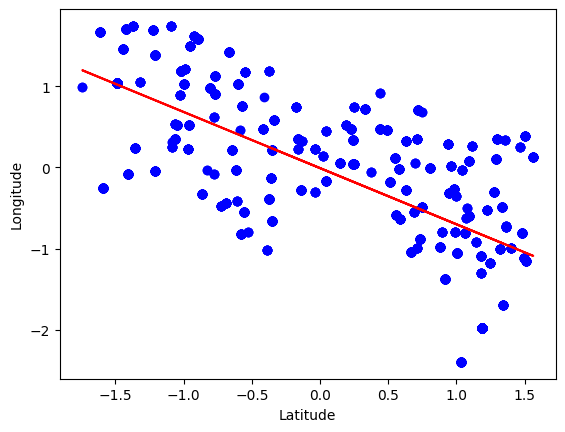

MAE:  0.5876144138815248
RMSE:  0.7040379183284659


In [139]:
model_linear=LinearRegression().fit(xtr,ytr)
predict_linear=model_linear.predict(xts)
plt.scatter(xts,yts,color="blue")
plt.plot(xts,predict_linear,color="red")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
print("MAE: ",mean_absolute_error(predict_linear,yts))
print("RMSE: ",np.sqrt(mean_squared_error(predict_linear,yts)))

## SVM

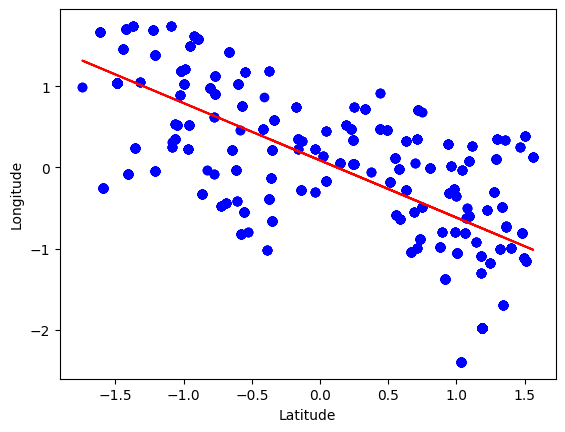

MAE:  0.5821865977214093
RMSE:  0.7065657132669715


In [140]:
model_svm=SVR(kernel='linear').fit(xtr,ytr)
predict_svr=model_svm.predict(xts)
plt.scatter(xts,yts,color="blue")
plt.plot(xts,predict_svr,color="red")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
print("MAE: ",mean_absolute_error(predict_svr,yts))
print("RMSE: ",np.sqrt(mean_squared_error(predict_svr,yts)))